In [1]:
#--- Code for loading the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

import sys
sys.path.append('../helpers')
from iaml01cw2_helpers import load_FashionMNIST
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST('../FashionMNIST')

Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

Xtrn /= 255.0
Xtst /= 255.0

Xmean = np.mean(Xtrn, axis=0)

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

/Users/xx/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Q2.1
def iaml01cw2_q2_1():
#
    lr = LogisticRegression()
    lr.fit(Xtrn_nm, Ytrn)
    y_pred = lr.predict(Xtst_nm)

    print(accuracy_score(Ytst, y_pred))
    print(confusion_matrix(Ytst, y_pred))
    
iaml01cw2_q2_1()   # comment this out when you run the function

0.8401
[[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


In [3]:
# Q2.2
def iaml01cw2_q2_2():
#
    svm = SVC()
    svm.fit(Xtrn_nm, Ytrn)
    y_pred = svm.predict(Xtst_nm)

    print(accuracy_score(Ytst, y_pred))
    print(confusion_matrix(Ytst, y_pred))
    
iaml01cw2_q2_2()   # comment this out when you run the function

0.8461
[[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]


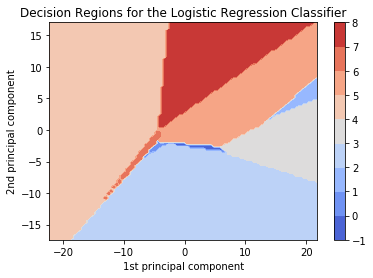

In [4]:
# Q2.3
def iaml01cw2_q2_3():
#
    lr = LogisticRegression()
    lr.fit(Xtrn_nm, Ytrn)
    
    pca = PCA(n_components=2).fit(Xtrn_nm)

    sigma1 = np.sqrt(pca.explained_variance_[0])
    sigma2 = np.sqrt(pca.explained_variance_[1])
    x_min, x_max = -5*sigma1, 5*sigma1
    y_min, y_max = -5*sigma2, 5*sigma2

    x, y = np.meshgrid(np.arange(x_min,x_max,(x_max-x_min)/100), np.arange(y_min,y_max,(y_max-y_min)/100))
    x_new = np.c_[x.ravel(),y.ravel()]
    x_new = pca.inverse_transform(x_new)
    z = lr.predict(x_new).reshape(x.shape)

    plt.contourf(x, y, z, cmap=plt.cm.coolwarm, levels=np.arange(-1,9))
    plt.colorbar()
    plt.title("Decision Regions for the Logistic Regression Classifier")
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.savefig('Q2_3.pdf')
    plt.show()

iaml01cw2_q2_3()   # comment this out when you run the function

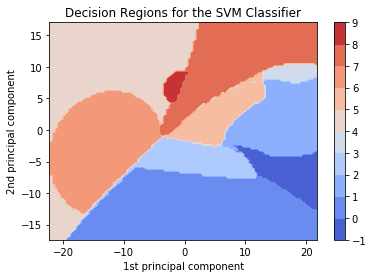

In [5]:
# Q2.4
def iaml01cw2_q2_4():
#
    svm = SVC()
    svm.fit(Xtrn_nm, Ytrn)
    
    pca = PCA(n_components=2).fit(Xtrn_nm)

    sigma1 = np.sqrt(pca.explained_variance_[0])
    sigma2 = np.sqrt(pca.explained_variance_[1])
    x_min, x_max = -5*sigma1, 5*sigma1
    y_min, y_max = -5*sigma2, 5*sigma2

    x, y = np.meshgrid(np.arange(x_min,x_max,(x_max-x_min)/100), np.arange(y_min,y_max,(y_max-y_min)/100))
    x_new = np.c_[x.ravel(),y.ravel()]
    x_new = pca.inverse_transform(x_new)
    z = svm.predict(x_new).reshape(x.shape)

    plt.contourf(x, y, z, cmap=plt.cm.coolwarm, levels=np.linspace(-1,9,11))
    plt.colorbar().set_ticks(np.linspace(-1,9,11))
    plt.title("Decision Regions for the SVM Classifier")
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.savefig('Q2_4.pdf')
    plt.show()

iaml01cw2_q2_4()   # comment this out when you run the function

0.8565023106939273
1.3333333333333335
21.544346900318846


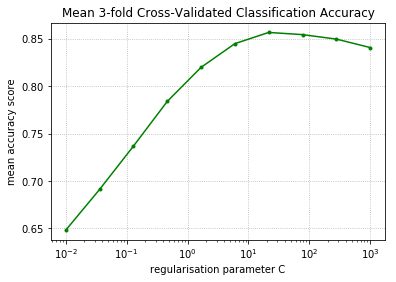

In [6]:
# Q2.5
def iaml01cw2_q2_5():
#
    Xsmall = Xtrn_nm[Ytrn==0][:1000]
    for label in range(1,10):
        Xsmall = np.r_[Xsmall,Xtrn_nm[Ytrn==label][:1000]]

    Ysmall = np.zeros(1000, dtype=int)
    for label in range(1,10):
        Ysmall = np.r_[Ysmall,np.full(1000, label, dtype=int)[:1000]]

    Clist = np.logspace(-2, 3, 10)
    score = []

    for C in Clist: 
        svm = SVC(C=C)
        score.append(cross_val_score(svm, Xsmall, Ysmall, cv=3))
        
    mean_score = np.mean(score, axis=1)
    max_index = np.argmax(mean_score)
    print(max(mean_score))
    print(np.log10(Clist[max_index]))
    print(Clist[max_index])
        
    plt.title('Mean 3-fold Cross-Validated Classification Accuracy')
    plt.grid(linestyle=':')

    plt.plot(Clist, mean_score, marker='.', c='green')
    plt.xscale('log')
    plt.xlabel('regularisation parameter C')
    plt.ylabel('mean accuracy score')
    plt.savefig('Q2_5.pdf')
    plt.show()

iaml01cw2_q2_5()   # comment this out when you run the function

In [7]:
# Q2.6 
def iaml01cw2_q2_6():
#
    svm = SVC(C=21.544)
    svm.fit(Xtrn_nm, Ytrn)
    y_pred = svm.predict(Xtst_nm)

    print(svm.score(Xtrn_nm, Ytrn))
    print(accuracy_score(Ytst, y_pred))

iaml01cw2_q2_6()   # comment this out when you run the function

0.9084333333333333
0.8765
